In [1]:
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

/home/venom/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# Download historical data for required stocks
ticker = "MSFT"
ohlcv = yf.download(ticker,dt.date.today()-dt.timedelta(1825),dt.datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
ohlcv

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-25,51.939999,52.650002,51.650002,51.790001,47.260017,34707700
2016-01-26,51.790001,52.439999,51.549999,52.169998,47.606789,28900800
2016-01-27,52.009998,52.200001,51.020000,51.220001,46.739880,36775200
2016-01-28,51.860001,52.209999,51.250000,52.060001,47.506405,62513800
2016-01-29,54.730000,55.090000,54.000000,55.090000,50.271385,83611700
...,...,...,...,...,...,...
2021-01-15,213.520004,214.509995,212.029999,212.649994,212.649994,31746500
2021-01-19,213.750000,216.979996,212.630005,216.440002,216.440002,30480900
2021-01-20,217.699997,225.789993,217.289993,224.339996,224.339996,37777300


In [4]:
def MACD(DF, a, b, c):
    """
    function to calculate MACD
    typical values a = 12, b = 26, c = 9
    """
    df = DF.copy()
    df["MA_Fast"] = df["Adj Close"].ewm(span=a, min_periods=a).mean()
    df["MA_Slow"] = df["Adj Close"].ewm(span=b, min_periods=b).mean()
    df["MACD"] = df["MA_Fast"] - df["MA_Slow"]
    df["Signal"] = df["MACD"].ewm(span=c, min_periods=c).mean()
    df.dropna(inplace=True)
    return df

In [5]:
# Visualization - plotting MACD/signal along with close price and volume for last 100 data points
df = MACD(ohlcv, 12, 26, 9)

In [6]:
df

,Open,High,Low,Close,Adj Close,Volume,MA_Fast,MA_Slow,MACD,Signal
Date,,,,,,,,,,
2016-03-11,53.000000,53.070000,52.380001,53.070000,48.775776,32275700,47.889794,47.651092,0.238702,0.181749
2016-03-14,52.709999,53.590000,52.630001,53.169998,48.867680,24083600,48.040674,47.747746,0.292927,0.206660
2016-03-15,52.750000,53.590000,52.740002,53.590000,49.253693,21104800,48.227749,47.866751,0.360999,0.240428
2016-03-16,53.450001,54.599998,53.400002,54.349998,49.952194,31691700,48.493598,48.030737,0.462862,0.288197
2016-03-17,54.209999,55.000000,54.000000,54.660000,50.237114,28223900,48.762302,48.203445,0.558857,0.345478
...,...,...,...,...,...,...,...,...,...,...
2021-01-15,213.520004,214.509995,212.029999,212.649994,212.649994,31746500,216.425892,216.997894,-0.572002,0.448969
2021-01-19,213.750000,216.979996,212.630005,216.440002,216.440002,30480900,216.428063,216.956569,-0.528506,0.253474
2021-01-20,217.699997,225.789993,217.289993,224.339996,224.339996,37777300,217.645283,217.503489,0.141794,0.231138


/home/venom/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


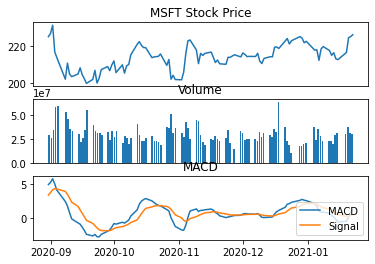

In [7]:
plt.subplot(311)
plt.plot(df.iloc[-100:,4])
plt.title('MSFT Stock Price')
plt.xticks([])

plt.subplot(312)
plt.bar(df.iloc[-100:,5].index, df.iloc[-100:,5].values)
plt.title('Volume')
plt.xticks([])

plt.subplot(313)
plt.plot(df.iloc[-100:,[-2,-1]])
plt.title('MACD')
plt.legend(('MACD','Signal'),loc='lower right')

plt.show()

/home/venom/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/venom/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/venom/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/venom/anaconda3/lib/python3.7/site-pac

Text(0.5, 0.98, 'Stock Price with MACD')

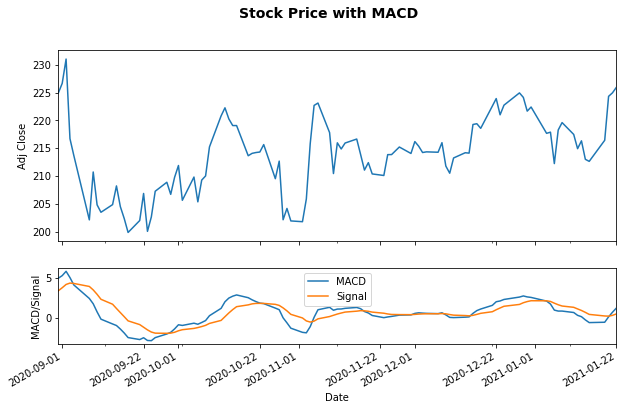

In [8]:
# Visualization - Using object orient approach
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2.5, 1]})
df.iloc[-100:,4].plot(ax=ax0)
ax0.set(ylabel='Adj Close')

df.iloc[-100:,[-2,-1]].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='MACD/Signal')

# Title the figure
fig.suptitle('Stock Price with MACD', fontsize=14, fontweight='bold')